## Elastic Net
Elastic Net is the Hybrid of both Ridge and ElasticNet regression, which uses both `L1 & L2 regularization`. It overcomes the limitations of the ElasticNet which are:
1. For `n`(number of records in dataset) < `p`(number of features in dataset) case (high dimensional case), ElasticNet can at most select n features. This has to do with the nature of convex optimization problem ElasticNet tries to minimize.
2. If there is a group of highly correlated variables, then the ElasticNet tends to select one variable from a group and ignore the others. That selection also happens to be arbitrary in nature.

Because of the above limitations , Elastic Net is a better feature selection method which takes into consideration the above problems too.

### Elastic Net Loss function
> 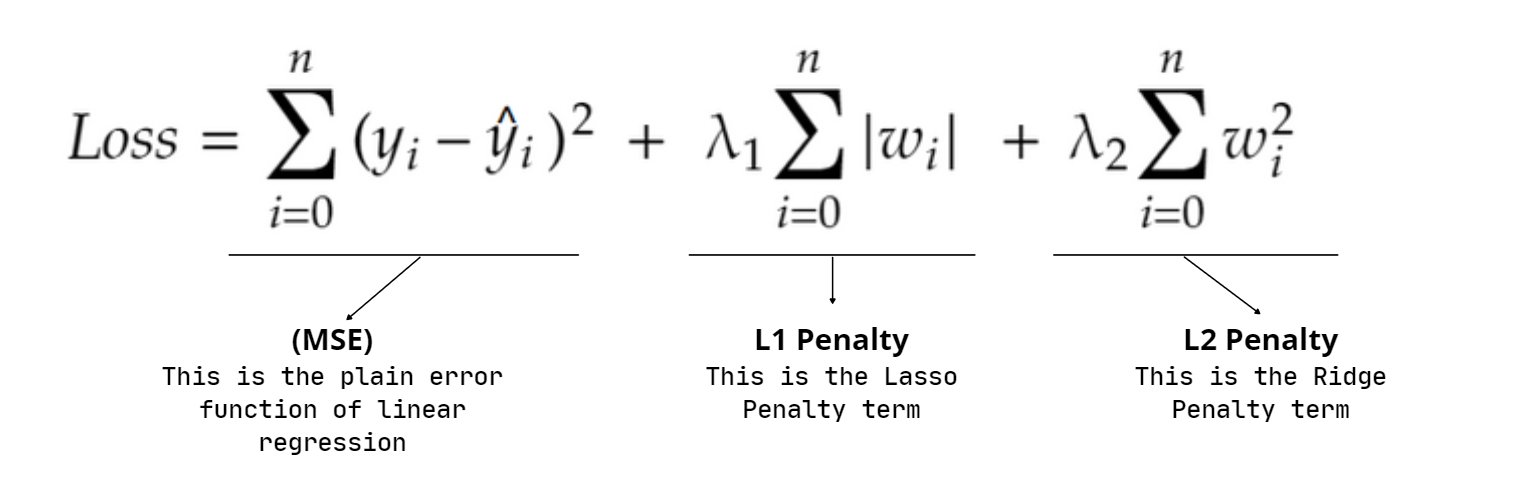

In Elastic net we have two λ as a tuning parameter,  λ1 controls the strength of ElasticNet and λ2 for Ridge. It can be in any order
* If λ1=0, then it becomes the Ridge regression and L2 penalty is added
* If λ2=0, then it becomes the ElasticNet regression and L1 penalty is added
* If λ1=0 & λ2=0, then it becomes plain linear regression error function

## Building Elastic Net Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['target'] = boston.target
df = pd.read_csv('house_prices.csv')
df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,1,0,0,0,0,1,0,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,0,0,0,0,1,0,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,0,0,0,0,1,0,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,1,0,0,0,0,1,0,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,0,0,0,0,1,0,189900


In [3]:
features = df.iloc[:, :-1]
label = df.iloc[:, -1]
print(features.shape, label.shape)

(2930, 304) (2930,)


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features_scaled = MinMaxScaler().fit_transform(features)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.2, random_state=31)
print('x_train',x_train.shape, 'x_test',x_test.shape, 'y_train',y_train.shape, 'y_test', y_test.shape)

x_train (2344, 304) x_test (586, 304) y_train (2344,) y_test (586,)


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lmodel = LinearRegression().fit(x_train, y_train)
y_pred = lmodel.predict(x_test)

# Accuracy of the model
print(metrics.r2_score(y_test, y_pred))

-3.1351239397758332e+16


In [8]:
print(metrics.r2_score(y_test, y_pred))
print(lmodel.score(x_train, y_train))
print(lmodel.score(x_test, y_test))

-3.1351239397758332e+16
0.9347017960202054
-3.1351239397758332e+16


From the above metrics we can clearly see that out model is overfitted

### Linear regression with cross validation
To find the best value of Linear Regression, we need to utilize the whole dataset and find the best sample with higher accuracy for that we can use cross validation

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='r2')

array([-1.51396960e+20, -4.42046903e+19, -1.31796110e+17, -2.62812729e+20,
       -1.99474402e+19])

So, these are the best score we are able to get from linear Regression

## Elastic Net Regression

In [10]:
from sklearn.linear_model import ElasticNet

In [11]:
emodel = ElasticNet(l1_ratio=0.99).fit(x_train, y_train)
y_pred = emodel.predict(x_test)

# Accuracy of the model
print(metrics.r2_score(y_test, y_pred))

0.8970567875104746


In [12]:
print(emodel.score(x_train, y_train))
print(emodel.score(x_test, y_test))

0.885841750758588
0.8970567875104746


From the above metrics we can see that how ElasticNet regression improved the performance of our model.

### ElasticNet Regression with cross validation
To find the best value of alpha or λ we can use ElasticNetCV function, which uses cross validation to find the best value of λ.

In [13]:
from sklearn.linear_model import ElasticNetCV
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5, shuffle=True, random_state=17)
modele = ElasticNetCV(l1_ratio=0.99)
modele.fit(x_train, y_train)
y_pred = modele.predict(x_test)
print('Score', metrics.r2_score(y_test, y_pred))
print('Values of Alpha(aka λ)', modele.alpha_)

Score 0.7495772227395752
Values of Alpha(aka λ) 23.41041241251523


In [14]:
print(sum(sorted(lmodel.coef_ == 0)))
print(sum(sorted(emodel.coef_ == 0)))

0
11


So in total ElasticNet Regresson eliminated 11 columns, which it thinks dosen't contribute in predicting price of a house